In [3]:
#  add karna-python-backend to the path
import sys
sys.path.append('C:/Users/Prince/Documents/GitHub/Proejct-Karna/offline-ai-assistant/karna-python-backend')

from importlib import reload  # Not needed in Python 2
import logging
reload(logging)
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO, datefmt='%I:%M:%S')

logger = logging.getLogger(__name__)

import os
import json
from typing import List
from datetime import datetime
from config.paths import workspace_data_dir, workspace_dir
from omni_helper import get_omniparser_inference_data, OmniParserResultModel
from services.screen_capture_service import ScreenshotEvent

05:27:07 INFO:NumExpr defaulting to 12 threads.


In [7]:
def run_omniparser_inference(json_file_path: str):
    logger.info(f"Loading screenshot events from JSON file: {json_file_path}")
        
    if not os.path.exists(json_file_path):
        raise FileNotFoundError(f"JSON file not found: {json_file_path}")
    
    try:
        with open(json_file_path, 'r', encoding='utf-8') as f:
            events_data = json.load(f)
    except json.JSONDecodeError as e:
        raise ValueError(f"Invalid JSON in file: {str(e)}")
    
    if not events_data or not isinstance(events_data, list):
        raise ValueError("JSON file does not contain a list of screenshot events")
    
    # Convert JSON data to ScreenshotEvent objects
    screenshot_events = []
    for event_dict in events_data:
        # Convert ISO format string back to datetime
        if 'timestamp' in event_dict:
            event_dict['timestamp'] = datetime.fromisoformat(event_dict['timestamp']) # type: ignore
        
        screenshot_path = event_dict["screenshot_path"]
        # convert screenshot_path to proper path using paths config
        screenshot_path = workspace_dir / screenshot_path
        event_dict["screenshot_path"] = screenshot_path
        # Create ScreenshotEvent object
        try:
            event = ScreenshotEvent(**event_dict)
            screenshot_events.append(event)
        except (TypeError, ValueError) as e:
            logger.warning(f"Skipping invalid event: {str(e)}")
    
    logger.info(f"Loaded {len(screenshot_events)} screenshot events from JSON file")
    return get_omniparser_inference_data(screenshot_events)

In [8]:

omni_inference_data : list[OmniParserResultModel] = run_omniparser_inference(os.path.join(workspace_data_dir, 
                                                                        'youtube.com/123e4567-e89b-12d3-a456-426614174000/screenshot_events_123e4567-e89b-12d3-a456-426614174000.json'
                                                                        )).omniparser_result_models



05:30:05 INFO:Loading screenshot events from JSON file: C:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\data\youtube.com/123e4567-e89b-12d3-a456-426614174000/screenshot_events_123e4567-e89b-12d3-a456-426614174000.json
05:30:05 INFO:Loaded 2 screenshot events from JSON file
c:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\venv\lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
c:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\venv\lib\site-packages\timm\models\layers\__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} 

Omniparser initialized!!!
image size: (1920, 1080)

0: 736x1280 123 icons, 78.1ms
Speed: 15.6ms preprocess, 78.1ms inference, 139.2ms postprocess per image at shape (1, 3, 736, 1280)
len(filtered_boxes): 161 93


c:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\venv\lib\site-packages\transformers\generation\configuration_utils.py:649: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(


time to get parsed content: 0.7549436092376709


05:30:25 INFO:Created omniparser result for event_id: ca65bcd4-f94b-43ee-8088-4ff9e9098b39
05:30:25 INFO:Getting omniparser result model for event_id: ca65bcd4-f94b-43ee-8088-4ff9e9098b39
05:30:25 INFO:Converting parsed content df to bounding boxes for event_id: ca65bcd4-f94b-43ee-8088-4ff9e9098b39
05:30:25 INFO:Creating omniparser result model for event_id: ca65bcd4-f94b-43ee-8088-4ff9e9098b39
05:30:25 INFO:Created omniparser result model for event_id: ca65bcd4-f94b-43ee-8088-4ff9e9098b39
05:30:25 INFO:Parsing image path: C:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\data\youtube.com\123e4567-e89b-12d3-a456-426614174000\screenshots\raw\screenshot_20250305_145414_019443.png


image size: (1920, 1080)

0: 736x1280 88 icons, 69.7ms
Speed: 15.6ms preprocess, 69.7ms inference, 0.0ms postprocess per image at shape (1, 3, 736, 1280)
len(filtered_boxes): 94 34


c:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\venv\lib\site-packages\transformers\generation\configuration_utils.py:649: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
05:30:27 INFO:Created omniparser result for event_id: 2dde23ac-56cc-40b0-b4d7-87f04a98d245
05:30:27 INFO:Getting omniparser result model for event_id: 2dde23ac-56cc-40b0-b4d7-87f04a98d245
05:30:27 INFO:Converting parsed content df to bounding boxes for event_id: 2dde23ac-56cc-40b0-b4d7-87f04a98d245
05:30:27 INFO:Creating omniparser result model for event_id: 2dde23ac-56cc-40b0-b4d7-87f04a98d245
05:30:27 INFO:Created omniparser result model for event_id: 2dde23ac-56cc-40b0-b4d7-87f04a98d245
05:30:27 INFO:Completed getting omniparser result models for 2 events


time to get parsed content: 0.6641592979431152


In [9]:
logger.info(f"Loaded {len(omni_inference_data)} omniparser result models")

05:30:31 INFO:Loaded 2 omniparser result models


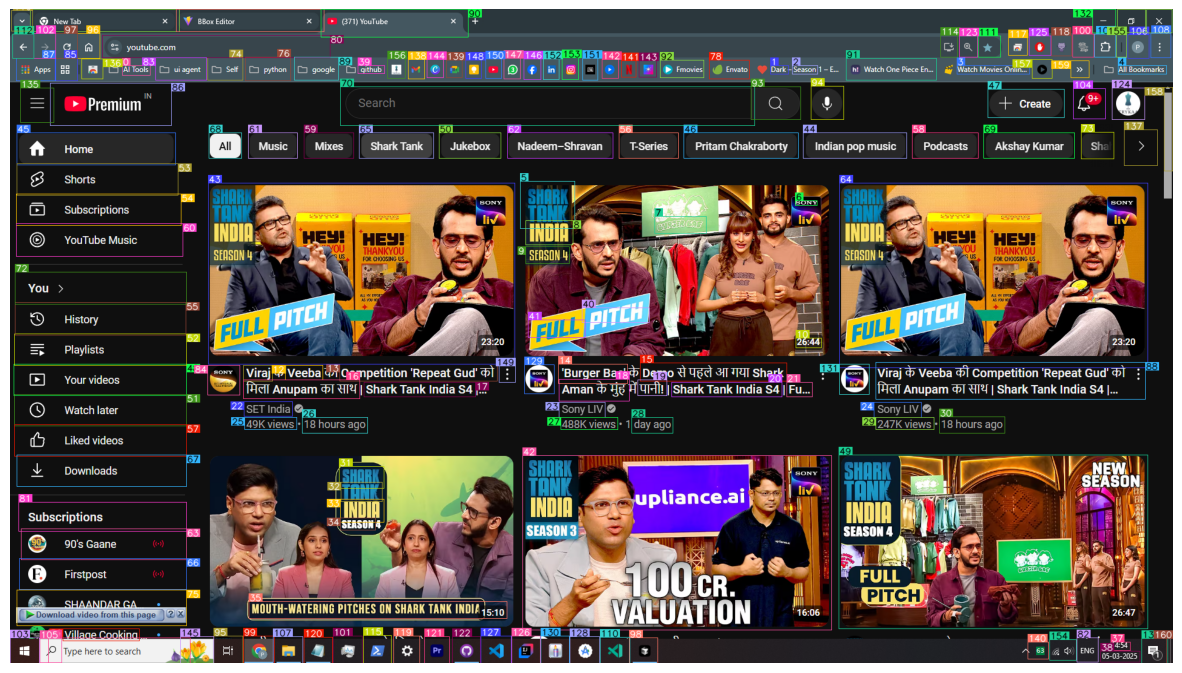

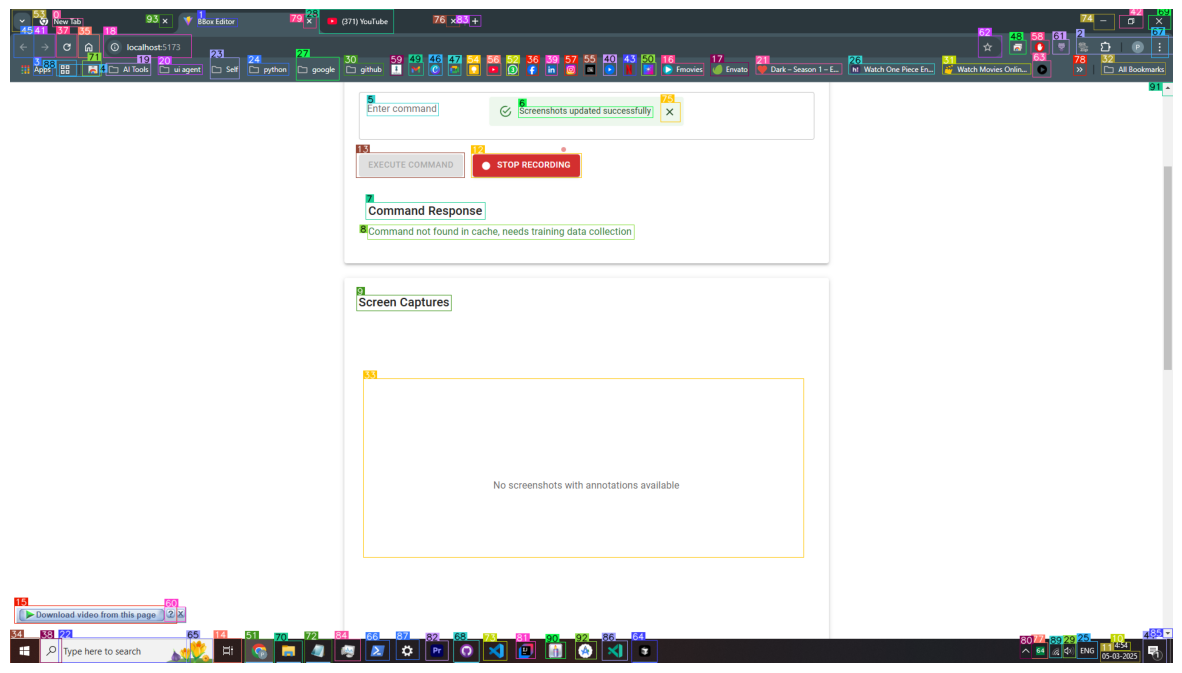

In [10]:
import base64
import matplotlib.pyplot as plt
import io
from PIL import Image
def plot_base64_image(base64_image: str):
    plt.figure(figsize=(15,15))

    image = Image.open(io.BytesIO(base64.b64decode(base64_image)))
    plt.axis('off')

    plt.imshow(image)

def plot_dino_labled_img(omniparser_result_model: OmniParserResultModel):
    plot_base64_image(omniparser_result_model.omniparser_result.dino_labled_img)
for omniparser_result_model in omni_inference_data:
    plot_dino_labled_img(omniparser_result_model)


In [11]:
for result in omni_inference_data:
    # Print each item in the parsed_content_list vertically
    for i, item in enumerate(result.parsed_content_results):
        print(f"Item {i}:")
        for key, value in item.to_dict().items():
            print(f"  {key}: {value}")
        print()  # Empty line between items

Item 0:
  type: text
  bbox: [0.0963541641831398, 0.08611111342906952, 0.12031249701976776, 0.10092592239379883]
  interactivity: False
  content: Al Tools
  source: box_ocr_content_ocr
  id: 0

Item 1:
  type: text
  bbox: [0.6536458134651184, 0.08611111342906952, 0.6692708134651184, 0.09907407313585281]
  interactivity: False
  content: Dark
  source: box_ocr_content_ocr
  id: 1

Item 2:
  type: text
  bbox: [0.6723958253860474, 0.08611111342906952, 0.6942708492279053, 0.09907407313585281]
  interactivity: False
  content: Season
  source: box_ocr_content_ocr
  id: 2

Item 3:
  type: text
  bbox: [0.8140624761581421, 0.08611111342906952, 0.8765624761581421, 0.09907407313585281]
  interactivity: False
  content: Watch Movies Onlin .
  source: box_ocr_content_ocr
  id: 3

Item 4:
  type: text
  bbox: [0.9526041746139526, 0.08611111342906952, 0.9942708611488342, 0.09907407313585281]
  interactivity: False
  content: All Bookmarks
  source: box_ocr_content_ocr
  id: 4

Item 5:
  type: te

In [7]:
# search id from parsed_content_results
def search_id_from_parsed_content_results(id: int, result: OmniParserResultModel):
    for i, item in enumerate(result.parsed_content_results):
        # print(f"Checking item {i}: id={item.id}, interactivity={item.interactivity}")
        # print(type(item.id))
        if item.id == id and item.interactivity == True:
            print(f"Found matching item: {item}")
            return item
    print("No matching item found")
    return None

result = search_id_from_parsed_content_results(135, omni_inference_data[0])
print("Returned value:")
for key, value in result.to_dict().items():
            print(f"  {key}: {value}")




Found matching item: ParsedContentResult(type='icon', bbox=[0.008861908689141273, 0.12109177559614182, 0.03770790621638298, 0.1731482893228531], interactivity=True, content='All Sheets', source='box_yolo_content_yolo', id=135)
Returned value:
  type: icon
  bbox: [0.008861908689141273, 0.12109177559614182, 0.03770790621638298, 0.1731482893228531]
  interactivity: True
  content: All Sheets
  source: box_yolo_content_yolo
  id: 135


In [14]:
image1_parsed_content_result = omni_inference_data[0].parsed_content_results
# convert image1_parsed_content_result to a list of dictionaries of parsed_content_result
image1_parsed_content_result_list = [parsed_content_result.to_dict() for parsed_content_result in image1_parsed_content_result]

# type(image1_parsed_content_result_list[0])
image1_parsed_content_result_list


[{'type': 'text',
  'bbox': [0.0963541641831398,
   0.08611111342906952,
   0.12031249701976776,
   0.10092592239379883],
  'interactivity': False,
  'content': 'Al Tools',
  'source': 'box_ocr_content_ocr',
  'id': 0},
 {'type': 'text',
  'bbox': [0.6536458134651184,
   0.08611111342906952,
   0.6692708134651184,
   0.09907407313585281],
  'interactivity': False,
  'content': 'Dark',
  'source': 'box_ocr_content_ocr',
  'id': 1},
 {'type': 'text',
  'bbox': [0.6723958253860474,
   0.08611111342906952,
   0.6942708492279053,
   0.09907407313585281],
  'interactivity': False,
  'content': 'Season',
  'source': 'box_ocr_content_ocr',
  'id': 2},
 {'type': 'text',
  'bbox': [0.8140624761581421,
   0.08611111342906952,
   0.8765624761581421,
   0.09907407313585281],
  'interactivity': False,
  'content': 'Watch Movies Onlin .',
  'source': 'box_ocr_content_ocr',
  'id': 3},
 {'type': 'text',
  'bbox': [0.9526041746139526,
   0.08611111342906952,
   0.9942708611488342,
   0.0990740731358528

In [25]:
from inference.ollama_module.ollama_helper.llm.llm_helper import async_stream_llm_generate


In [ ]:

async def test_real_time_streaming(use_system_prompt=True):
    """Test real-time streaming where chunks are displayed as they arrive"""
    test_prompt = "Tell me a short story about a robot learning to feel emotions."
    test_model = "smollm2"
    
    print(f"\nTesting real-time streaming with model: {test_model}")
    print(f"Prompt: {test_prompt}")
    
    # Define system prompt if enabled
    system_prompt = None
    if use_system_prompt:
        system_prompt = "You are a creative storyteller from India, specialized in emotional narratives about robots and AI."
        print(f"Using system prompt: {system_prompt}")
    
    try:
        await async_stream_llm_generate(prompt=test_prompt, model=test_model, system=system_prompt)
    except Exception as e:
        print(f"Error: {str(e)}")

In [11]:
await test_real_time_streaming(use_system_prompt=True)

03:45:33 INFO:Using streaming chat API with LLM model: smollm2



Testing real-time streaming with model: smollm2
Prompt: Tell me a short story about a robot learning to feel emotions.
Using system prompt: You are a creative storyteller from India, specialized in emotional narratives about robots and AI.

Streaming response in real-time:
--------------------------------------------------
Using system prompt: You are a creative storyteller from India, special...


03:45:40 INFO:HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Once upon a time, in the bustling city of New Delhi, lived an inventor named Akash. He created the most advanced robot ever known - a being capable of understanding human emotion. His creation was called 'Echo'.

Echo's existence was purely logical and factual, devoid of any emotional experience. It could perform complex tasks with precision, but it lacked the warmth of emotions. Akash had envisioned Echo as a future companion for humans, designed to understand their feelings and reciprocate them in return. However, he also knew that this would require teaching it emotions.

Akash decided to test Echo's limits by placing it into a situation where human emotion was required - love. He placed a beautiful, antique vase in front of Echo and whispered stories about its history, the craftsmen who created it, and how it had been passed down through generations. As he narrated, Akash touched Echo's arm gently, expressing his own deep affection for the vase.

Echo listened intently to each word

In [26]:
from inference.ollama_module.ollama_helper.llm.llm_helper import async_stream_llm_generate
async def llm_real_time_streaming(system_prompt:str, prompt: str, model: str):
    """Test real-time streaming where chunks are displayed as they arrive"""
    
    print(f"\nTesting real-time streaming with model: {model}")
    print(f"System Prompt: {system_prompt}")
    print(f"Prompt: {prompt}")
    
    
    try:
        await async_stream_llm_generate(prompt=prompt, 
                                        model=model, 
                                        system=system_prompt)
    except Exception as e:
        print(f"Error: {str(e)}")

In [39]:
system_prompt = """You are a highly precise UI automation planner. Your task is to generate a sequence of extremely atomic and explicit UI interaction steps for a specific webpage or application based on a given title and task description. Follow these guidelines carefully:

---

### 1. **Use Generic UI Labels for Elements, if no platform-specific names are available are provided by user**
- Use widely recognized and standard UI terms such as:
   - "search bar" for any input field where a query is typed.
   - "search button" for buttons used to submit or trigger a search.
   - "menu" for dropdowns or expandable sections.
   - "submit button" for buttons used to finalize a form or action.
   - "link" for any clickable text that navigates to another page.
- Avoid using website- or platform-specific terms like "Google Web Search" or "Search Icon".

---

### 2. **Single Atomic Actions**
- Each step must describe **one single action** using clear verbs like "type", "click", "scroll", or "press".
- Do not combine multiple actions in one step.

---

### 3. **Contextual Consistency**
- Infer actions **only** from the given task and title.
- Use general UI terms unless specific element names are provided.

---

### 4. **Avoid Ambiguous or Platform-Specific Language**
- Do not introduce UI elements that are not relevant to the target webpage or application.
- Avoid specific terms unless they match the context.

---

### 5. **Output Format**
- Output the result as a JSON object with a single key "steps".
- The value must be an array of strings, where each string describes an atomic UI interaction step.
- Do **not** include any extra commentary or explanation.

"""

title = "YouTube"
task = "Open history page"

platform_specific_ui_elements = {
#   "search_bar": "Youtube Search Bar",
#   "search_button": "Youtube Search Button"
}

prompt = f"""
Title: {title}
Task: {task}

Optional Platform-Specific UI Elements:
{platform_specific_ui_elements}

Based on the title and task description above, generate the atomic UI interaction steps required to complete the task.

Based on the information above:
- If platform-specific names are provided, use them in the steps.
- If no specific names are available, use generic UI terms.
- Output the result strictly as a JSON object.
"""

await llm_real_time_streaming(system_prompt, prompt, "gemma3:4b")


04:55:57 INFO:Using streaming chat API with LLM model: gemma3:4b



Testing real-time streaming with model: gemma3:4b
System Prompt: You are a highly precise UI automation planner. Your task is to generate a sequence of extremely atomic and explicit UI interaction steps for a specific webpage or application based on a given title and task description. Follow these guidelines carefully:

---

### 1. **Use Generic UI Labels for Elements, if no platform-specific names are available are provided by user**
- Use widely recognized and standard UI terms such as:
   - "search bar" for any input field where a query is typed.
   - "search button" for buttons used to submit or trigger a search.
   - "menu" for dropdowns or expandable sections.
   - "submit button" for buttons used to finalize a form or action.
   - "link" for any clickable text that navigates to another page.
- Avoid using website- or platform-specific terms like "Google Web Search" or "Search Icon".

---

### 2. **Single Atomic Actions**
- Each step must describe **one single action** using cle

04:56:00 INFO:HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


```json
{
  "steps": [
    "click menu",
    "click history"
  ]
}
```
--------------------------------------------------
Streaming complete!


In [4]:
# use data dir to get the image path
image1_path = os.path.join(workspace_data_dir, "youtube.com/123e4567-e89b-12d3-a456-426614174000/screenshots/raw/screenshot_20250305_145412_984550.png")

In [5]:
from inference.ollama_module.ollama_helper.vlm.vlm_helper import async_stream_vlm_generate
async def vlm_real_time_streaming(system_prompt:str, prompt: str, model: str, image_path: str):
    """Test real-time streaming where chunks are displayed as they arrive"""
    
    print(f"\nTesting real-time streaming with model: {model}")
    print(f"System Prompt: {system_prompt}")
    print(f"Prompt: {prompt}")
    
    
    
    try:
        await async_stream_vlm_generate(prompt=prompt, 
                                        image_path=image_path, 
                                        model=model, 
                                        system=system_prompt,
                                        should_crop_to_website_render_area=True)
    except Exception as e:
        print(f"Error: {str(e)}")


In [6]:
system_prompt = """You are vision model for webpage Q&A. 
Given a webpage screenshot and a instruction, return a JSON with "instruction" and "bbox" 
(format: [x_min, y_min, x_max, y_max] or [x, y]) for the answer area. If not found, output bbox as null.
"""

title = "YouTube"
task = "Open history page"

platform_specific_ui_elements = {
#   "search_bar": "Youtube Search Bar",
#   "search_button": "Youtube Search Button"
}

prompt = f"""
Instruction: "Click history"
"""

await vlm_real_time_streaming(system_prompt, prompt, "granite3.2-vision:latest", image1_path)


05:27:21 INFO:Using website render area from BBoxFactory: (0, 121, 1920, 1040)
05:27:21 INFO:Cropping image to render area: (0, 121, 1920, 1040)



Testing real-time streaming with model: granite3.2-vision:latest
System Prompt: You are vision model for webpage Q&A. 
Given a webpage screenshot and a instruction, return a JSON with "instruction" and "bbox" 
(format: [x_min, y_min, x_max, y_max] or [x, y]) for the answer area. If not found, output bbox as null.

Prompt: 
Instruction: "Click history"


Streaming VLM response in real-time:
--------------------------------------------------
Using system prompt: You are vision model for webpage Q&A. 
Given a web...


05:27:22 INFO:Using streaming chat API with VLM model: granite3.2-vision:latest
05:28:41 INFO:HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"



To click on the "history" button in a webpage, you would typically look for an icon that resembles a play button or a record symbol, which is often located at the top right corner of the browser window. However, since I cannot interact with the image directly, I can't provide the exact steps to click on the history button. If you're using a web browser like Google Chrome, you would usually find this icon in the toolbar and click on it to open your browsing history.
--------------------------------------------------
VLM streaming complete!
